### Part 1: Import necessary libraries and load the dataset

In [60]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [43]:
#load training dataset

source = pd.read_csv("train.csv")
source.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
#Get the shape of the dataset
print(source.shape)

(1460, 81)


### Part 2: Recode categorical variables into numbers

In [45]:
#create replacement library

cleanup = {"LotShape" : {"Reg":0, "IR1":-1, "IR2":-2, "IR3":-3},
           "LandSlope": {"Gtl":0, "Mod":-1, "Sev":-2},
           "HouseStyle": {"1Story":1, "1.5Fin":1.5, "1.5Unf":1.25, "2Story":2, "2.5Fin":2.5, "2.5Unf":2.25, "SFoyer": -1, "SLvl": -1.5}, 
           #code external quality based on the numbers assigned to OverallCond & OverallQual
           "ExterQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "ExterCond" : {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1}, 
           "BsmtQual" : {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "BsmtCond": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           #split levels or foyers typically score average or above in bsmtExposure
           "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0},
           "BsmtFinType1": {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0},
           "BsmtFinType2": {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0},
           "HeatingQC": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "CentralAir": {"N": 0, "Y": 1},
           "KitchenQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "Functional": {"Typ":0, "Min1":-1, "Min2":-2, "Mod":-3, "Maj1":-4, "Maj2":-5, "Sev":-6, "Sal":-7},
           "FireplaceQu": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "GarageFinish": {"Fin":3, "RFn":2, "Unf":1, "NA":0},
           "GarageQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "GarageCond": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "PavedDrive": {"Y": 2, "P":1, "N":0},
           "PoolQC": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "NA": 0}}

df = source.replace(cleanup)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
#onehot encoding
catlist = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df_onehot = pd.get_dummies(df[catlist], prefix = '', prefix_sep = '')
df_onehot['Id'] = df['Id']
df_onehot.head()

,C (all),FV,RH,RL,RM,Grvl,Pave,Grvl,Pave,Bnk,...,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Id
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,3
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,4
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,5


In [47]:
#drop the one-hot coded columns from df
df.drop(catlist, axis = 1, inplace = True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,0,0,2.0,7,5,2003,...,61,0,0,0,0,NaN,0,2,2008,208500
1,2,20,80.0,9600,0,0,1.0,6,8,1976,...,0,0,0,0,0,NaN,0,5,2007,181500
2,3,60,68.0,11250,-1,0,2.0,7,5,2001,...,42,0,0,0,0,NaN,0,9,2008,223500
3,4,70,60.0,9550,-1,0,2.0,7,5,1915,...,35,272,0,0,0,NaN,0,2,2006,140000
4,5,60,84.0,14260,-1,0,2.0,8,5,2000,...,84,0,0,0,0,NaN,0,12,2008,250000


In [50]:
#merge the remaining of df with df_onehot
df = df.join(df_onehot.set_index('Id'), on = 'Id')
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,0,0,2.0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,0,0,1.0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,-1,0,2.0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,-1,0,2.0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,-1,0,2.0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


### Part 3: Extrapolatory analysis

In [59]:
#graph the distribution of salesprice
min = df['SalePrice'].min()
max = df['SalePrice'].max()
print(min, max)

34900 755000


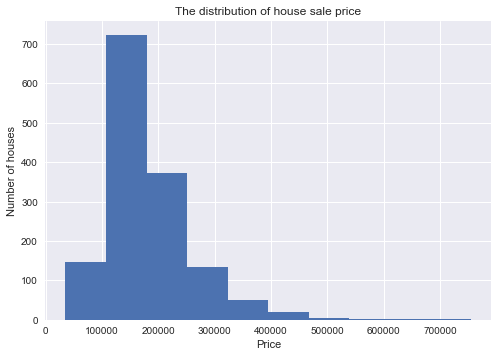

In [73]:
df['SalePrice'].plot(kind = 'hist')

plt.title('The distribution of house sale price')
plt.ylabel('Number of houses')
plt.xlabel('Price')
plt.show()